### CNN

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import os

In [8]:
import os
import shutil

# Path utama untuk ranks
ranks_dir = "../imgs/ranks"

# Membuat sub-folder untuk setiap file rank
for filename in os.listdir(ranks_dir):
    if filename.endswith(".jpg"):
        # Dapatkan nama kelas (misalnya '0' atau 'Q')
        class_name = filename.split(".")[0]
        # Buat folder berdasarkan nama kelas jika belum ada
        class_path = os.path.join(ranks_dir, class_name)
        if not os.path.exists(class_path):
            os.makedirs(class_path)
        # Pindahkan file ke folder yang sesuai
        shutil.move(
            os.path.join(ranks_dir, filename), os.path.join(class_path, filename)
        )

# Path utama untuk suits
suits_dir = "../imgs/suits"

# Membuat sub-folder untuk setiap file suit
for filename in os.listdir(suits_dir):
    if filename.endswith(".jpg"):
        # Dapatkan nama kelas (misalnya 'Clubs' atau 'Hearts')
        class_name = filename.split(".")[0]
        # Buat folder berdasarkan nama kelas jika belum ada
        class_path = os.path.join(suits_dir, class_name)
        if not os.path.exists(class_path):
            os.makedirs(class_path)
        # Pindahkan file ke folder yang sesuai
        shutil.move(
            os.path.join(suits_dir, filename), os.path.join(class_path, filename)
        )

In [ ]:
# Direktori utama dataset
rank_dir = "../imgs/ranks"
suit_dir = "../imgs/suits"

# Parameters
rank_img_size = (70, 125)
suit_img_size = (70, 100)
batch_size = 16

# Membuat ImageDataGenerator untuk Train dan Validation
rank_datagen = ImageDataGenerator(
    rescale=1.0 / 255, validation_split=0.2  # 20% data untuk validasi
)  # Membuat ImageDataGenerator untuk Rank

rank_train_generator = rank_datagen.flow_from_directory(
    rank_dir,
    target_size=rank_img_size,
    batch_size=batch_size,
    class_mode="categorical",
    subset="training",
)


# Membuat ImageDataGenerator untuk Suit
suit_datagen = ImageDataGenerator(
    rescale=1.0 / 255, validation_split=0.2  # 20% data untuk validasi
)

suit_train_generator = suit_datagen.flow_from_directory(
    suit_dir,
    target_size=suit_img_size,
    batch_size=batch_size,
    class_mode="categorical",
    subset="training",
)



In [16]:
# Membuat model CNN (misalnya untuk Rank)
rank_model = models.Sequential(
    [
        layers.Conv2D(
            32,
            (3, 3),
            activation="relu",
            input_shape=(rank_img_size[1], rank_img_size[0], 3),
        ),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation="relu"),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation="relu"),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation="relu"),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(512, activation="relu"),
        layers.Dense(rank_train_generator.num_classes, activation="softmax"),
    ]
)

rank_model.compile(
    optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"]
)

# Melatih model tanpa menggunakan validasi
epochs = 10
rank_history = rank_model.fit(rank_train_generator, epochs=epochs)

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.0769 - loss: 2.5652
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.4615 - loss: 2.3197
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.7692 - loss: 1.9521
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.9231 - loss: 1.3659
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 1.0000 - loss: 0.6617
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 1.0000 - loss: 0.1686
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 1.0000 - loss: 0.0705
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.9231 - loss: 0.3103
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 1.0000 - loss: 0.0059
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.9231 - loss: 0.6166


In [17]:
suit_model = models.Sequential(
    [
        layers.Conv2D(
            32,
            (3, 3),
            activation="relu",
            input_shape=(suit_img_size[1], suit_img_size[0], 3),
        ),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation="relu"),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation="relu"),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation="relu"),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(512, activation="relu"),
        layers.Dense(suit_train_generator.num_classes, activation="softmax"),
    ]
)

suit_model.compile(
    optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"]
)

suit_history = suit_model.fit(suit_train_generator, epochs=epochs)

Epoch 1/10


c:\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.0000e+00 - loss: 1.3988
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.7500 - loss: 1.3258
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.7500 - loss: 1.2228
Epoch 4/10


c:\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 1.0000 - loss: 1.0878
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 1.0000 - loss: 0.9033
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 1.0000 - loss: 0.6695
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 1.0000 - loss: 0.4174
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 1.0000 - loss: 0.2080
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 1.0000 - loss: 0.0901
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 1.0000 - loss: 0.0494


In [18]:
# Menyimpan model yang telah dilatih
suit_model.save("suit_classification_model.h5")
rank_model.save("rank_classification_model.h5")

In [19]:
suit_model = tf.keras.models.load_model("suit_classification_model.h5")
rank_model = tf.keras.models.load_model("rank_classification_model.h5")

### TEMPLATE MATCHING

In [21]:
import cv2
import numpy as np

def match_card(input_image_path, template_image_path):
    # Baca input gambar dan template
    input_image = cv2.imread(input_image_path, 0)
    template_image = cv2.imread(template_image_path, 0)

    # Terapkan template matching
    result = cv2.matchTemplate(input_image, template_image, cv2.TM_CCOEFF_NORMED)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)

    # Threshold untuk menentukan kecocokan
    threshold = 0.8
    if max_val >= threshold:
        print(f"Match found with score: {max_val}")
        # Gambarkan rectangle di sekitar area yang cocok
        h, w = template_image.shape
        top_left = max_loc
        bottom_right = (top_left[0] + w, top_left[1] + h)
        cv2.rectangle(input_image, top_left, bottom_right, (255, 0, 0), 2)
        cv2.imshow("Detected Card", input_image)
        cv2.waitKey(0)
    else:
        print("No match found.")

# Contoh penggunaan
match_card(r'C:\Local Disk E\Code\Python\PCV\PokerCard\dataset\3C.png', r'C:\Local Disk E\Code\Python\PCV\PokerCard\dataset\3C.png')


Match found with score: 1.0


### RESNET

In [24]:
import os
import json

def extract_labels(file_name):
    card_value = file_name[:-6]  # Mengambil nilai kartu
    card_suit = file_name[-6]    # Mengambil jenis kartu (S, D, H, C)
    return card_value, card_suit

# Baca file JSON
with open(r"C:\Users\agusf\Downloads\Compressed\annotation.json\annotation.json", 'r') as f:
    data = json.load(f)

labels = []
for image in data['images']:
    file_name = image['file_name']
    card_value, card_suit = extract_labels(file_name)
    labels.append({'file_name': file_name, 'value': card_value, 'suit': card_suit})

# Cetak label untuk setiap gambar
for label in labels:
    print(label)


{'file_name': '10D17.jpg', 'value': '10D', 'suit': '1'}
{'file_name': '10S18.jpg', 'value': '10S', 'suit': '1'}
{'file_name': 'KD49.jpg', 'value': 'KD', 'suit': '4'}
{'file_name': '2C4.jpg', 'value': '2', 'suit': 'C'}
{'file_name': 'AS38.jpg', 'value': 'AS', 'suit': '3'}
{'file_name': '8S36.jpg', 'value': '8S', 'suit': '3'}
{'file_name': '10D37.jpg', 'value': '10D', 'suit': '3'}
{'file_name': '3H43.jpg', 'value': '3H', 'suit': '4'}
{'file_name': '3D18.jpg', 'value': '3D', 'suit': '1'}
{'file_name': '10H32.jpg', 'value': '10H', 'suit': '3'}
{'file_name': 'QS18.jpg', 'value': 'QS', 'suit': '1'}
{'file_name': '7D1.jpg', 'value': '7', 'suit': 'D'}
{'file_name': '2D25.jpg', 'value': '2D', 'suit': '2'}
{'file_name': '9S28.jpg', 'value': '9S', 'suit': '2'}
{'file_name': 'QD46.jpg', 'value': 'QD', 'suit': '4'}
{'file_name': '4D21.jpg', 'value': '4D', 'suit': '2'}
{'file_name': '6H2.jpg', 'value': '6', 'suit': 'H'}
{'file_name': 'KD33.jpg', 'value': 'KD', 'suit': '3'}
{'file_name': '6D48.jpg', 

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load model ResNet50 pre-trained
base_model = ResNet50(weights='imagenet', include_top=False)

# Tambahkan layer klasifikasi di atasnya
x = base_model.output
x = GlobalAveragePooling2D()(x)
predictions = Dense(52, activation='softmax')(x)  # 52 jenis kartu poker

model = Model(inputs=base_model.input, outputs=predictions)

# Freeze semua layer dari ResNet50
for layer in base_model.layers:
    layer.trainable = False

# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Data augmentation dan preprocessing gambar
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_generator = train_datagen.flow_from_directory(
    'path/to/dataset',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)
validation_generator = train_datagen.flow_from_directory(
    'path/to/dataset',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# Melatih model
model.fit(train_generator, validation_data=validation_generator, epochs=10)


### CNN BARU

In [4]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import os

In [ ]:
tf.config.list_physical_devices('GPU')

[LogicalDevice(name='/device:CPU:0', device_type='CPU')]

In [ ]:
train_dir = "../dataset/train"  # Ganti dengan path ke folder train dataset Anda
validation_dir = "../dataset/valid"  # Ganti jika Anda memiliki folder validasi


# Define the CNN model
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    validation_split=0.2,  # Membagi dataset menjadi 80% train dan 20% validation
    subset="training",
    seed=123,  # Seed untuk konsistensi data split
    image_size=(150, 150),  # Ukuran gambar yang distandardisasi
    batch_size=32,
)

validation_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(150, 150),
    batch_size=32,
)

# Membangun CNN model
model = models.Sequential(
    [
        layers.Rescaling(1.0 / 255, input_shape=(150, 150, 3)),  # Normalisasi pixel
        layers.Conv2D(32, (3, 3), activation="relu"),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation="relu"),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation="relu"),
        layers.Flatten(),
        layers.Dense(64, activation="relu"),
        layers.Dense(
            len(train_dataset.class_names), activation="softmax"
        ),  # Output node sesuai jumlah kelas
    ]
)

# Kompilasi model
model.compile(
    optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)

Found 7596 files belonging to 53 classes.
Using 6077 files for training.
Found 7596 files belonging to 53 classes.
Using 1519 files for validation.


In [ ]:
# Pelatihan model
history = model.fit(train_dataset, validation_data=validation_dataset, epochs=10)

# Visualisasi hasil pelatihan
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.ylim([0, 1])
plt.legend(loc="lower right")
plt.show()

# Evaluasi model
loss, accuracy = model.evaluate(validation_dataset)
print(f"Validation accuracy: {accuracy}")

In [3]:
model.save('model2.h5')

# Usage

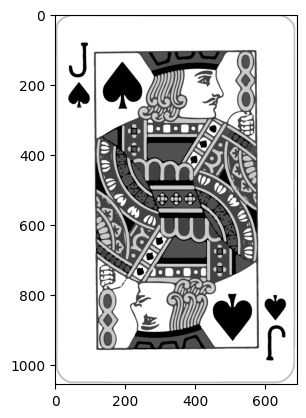

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
Card: 32


In [39]:
# Contoh penggunaan CNN
import cv2
import numpy as np
from tensorflow.keras.models import load_model

# Load model CNN
model = load_model('model.h5')

# Baca gambar
image = cv2.imread('../dataset/JS.png', 0)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB, image)
plt.imshow(image, cmap='gray')
plt.show()
image = cv2.resize(image, (150, 150))
image = np.expand_dims(image, axis=0)

# Lakukan prediksi
predictions = model.predict(image)
card = np.argmax(predictions[0])


print(f"Card: {card}")
# print (predictions)

In [37]:
# Print  nama tiap sub folder beserta indeksnya
import os
for i, name in enumerate(train_dataset.class_names):
    print(i, name)

0 ace of clubs
1 ace of diamonds
2 ace of hearts
3 ace of spades
4 eight of clubs
5 eight of diamonds
6 eight of hearts
7 eight of spades
8 five of clubs
9 five of diamonds
10 five of hearts
11 five of spades
12 four of clubs
13 four of diamonds
14 four of hearts
15 four of spades
16 jack of clubs
17 jack of diamonds
18 jack of hearts
19 jack of spades
20 joker
21 king of clubs
22 king of diamonds
23 king of hearts
24 king of spades
25 nine of clubs
26 nine of diamonds
27 nine of hearts
28 nine of spades
29 queen of clubs
30 queen of diamonds
31 queen of hearts
32 queen of spades
33 seven of clubs
34 seven of diamonds
35 seven of hearts
36 seven of spades
37 six of clubs
38 six of diamonds
39 six of hearts
40 six of spades
41 ten of clubs
42 ten of diamonds
43 ten of hearts
44 ten of spades
45 three of clubs
46 three of diamonds
47 three of hearts
48 three of spades
49 two of clubs
50 two of diamonds
51 two of hearts
52 two of spades
